In [80]:
from crear_dataset import *
from funcions_net import *
import numpy as np
import matplotlib.pyplot as plt
import pyreadstat
import pandas as pd
from preprocessing import *
from func_sel import *
import pyreadstat
import pandas as pd
from crear_dataset import *


In [81]:

df_orig, meta = pyreadstat.read_sav("CEJFEAjut2015Updated.sav")

df_variables = pd.read_csv("variables.csv", sep=';')

dict = create_dict(meta)

print("Creem diccionari")

Creem diccionari


In [82]:

df = create_dataset_2(df_orig, dict)
df = origen(df,df_orig)

Hola


c:\Users\jjf20\OneDrive\Documents\Universitat\TFG\crear_dataset.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Delictes molt violents'] = 0
c:\Users\jjf20\OneDrive\Documents\Universitat\TFG\crear_dataset.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[dict[num]] = np.where(df[dict[num]] == 5, 1, 0)
c:\Users\jjf20\OneDrive\Documents\Universitat\TFG\crear_dataset.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [83]:
print("Mirem quants nans tenim a cada columna")
netejat,df = neteja_na_columns(df, llindar=0.6)

df = omple_nans(df)

print("Columnes netejades")
## fem label encoding de les columnes categòriques
df = label_encoding(df)

df['temps_fins_reincidencia1a'] = df['temps_fins_reincidencia1a'].apply(lambda x: 1095 if x > 1095 else x)

Mirem quants nans tenim a cada columna
Columnes netejades


c:\Users\jjf20\OneDrive\Documents\Universitat\TFG\preprocessing.py:73: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_net[col].fillna(mitjana, inplace=True)
c:\Users\jjf20\OneDrive\Documents\Universitat\TFG\preprocessing.py:79: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [84]:
num_columnes = df.shape[1]
print("Hem netejat les columnes i hem fet label encoding")
print("Tenim ", num_columnes, " columnes")

Hem netejat les columnes i hem fet label encoding
Tenim  89  columnes


In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='temps_fins_reincidencia1a'), df['temps_fins_reincidencia1a'], test_size=0.2,random_state=42)


In [86]:
from ctgan import CTGAN
from sklearn.preprocessing import MinMaxScaler


# Suposem un dataset real en 'df'
# Suposant que X_train és un DataFrame i y_train és una sèrie
X_train_2 = pd.DataFrame(X_train, columns=df.drop(columns='temps_fins_reincidencia1a').columns).reset_index(drop=True)
y_train_2 = pd.Series(y_train).reset_index(drop=True)

df_train = X_train_2.copy()
df_train['temps_fins_reincidencia1a'] = y_train_2


In [87]:
from sklearn.utils import resample

n_samples = int(len(X_train) * 1.5)
df_train_bootstrap = resample(df_train, replace=True, n_samples=n_samples, random_state=42)

# Afegim soroll discret:
# df_train_bootstrap_noisy = afegir_soroll_discret(df_train_bootstrap, prob_mutacio=0.1)


## treiem la x i la y

X_train_bootstrap = df_train_bootstrap.drop(columns='temps_fins_reincidencia1a')
y_train_bootstrap = df_train_bootstrap['temps_fins_reincidencia1a']


In [88]:
from sklearn.preprocessing import StandardScaler

## normalitzem les dades
scaler = StandardScaler()
X_train_bootstrap = scaler.fit_transform(X_train_bootstrap)
X_train_bootstrap = pd.DataFrame(scaler.fit_transform(X_train_bootstrap), columns=df.drop(columns='temps_fins_reincidencia1a').columns)


In [93]:
import pandas as pd

# Assegura que y_train_2 és una Series
X_synthetic = pd.concat([X_train_2, X_train_bootstrap], ignore_index=True)
y_synthetic = pd.concat([y_train_2, y_train_bootstrap], ignore_index=True)


print("X_train_2:", X_train_2.shape)
print("X_train_bootstrap:", X_train_bootstrap.shape)
print("X_synthetic:", X_synthetic.shape)

print("y_train_2:", y_train_2.shape)
print("y_train_bootstrap:", y_train_bootstrap.shape)
print("y_synthetic:", y_synthetic.shape)


X_train_2: (57, 88)
X_train_bootstrap: (85, 88)
X_synthetic: (142, 88)
y_train_2: (57,)
y_train_bootstrap: (85,)
y_synthetic: (142,)


In [90]:
X_train_filtrat, coef_significatius = filter_significant_features(X_synthetic,y_synthetic, df, llindar=0.1,alpha=1, print_results=True)

Hem fet el model Lasso
Hem trobat  24  coeficients nuls
Hem trobat  64  coeficients no nuls
Els coeficients no nuls ordenats per valor absolut són:
CAPEe_PT_3items            -259.678585
SD3Narc                    -151.228529
YPI_PT                     -125.784664
ICUJ_UE                     119.171361
Gitanos                    -118.626443
CAPEo_PT                    107.738662
Pare_Catala_Fora_Espanya     94.730621
Unio_Europea                 91.561044
PCLe20                       87.159843
EdatAD                       80.418790
ICUJ_UC                     -73.981668
VASTVic                      73.612832
TRFTGrupDSMCDConsCAPEe       70.057158
YPI_LY                       68.600241
SAVRYInd                    -68.494824
Fet10_tipologia_JA           68.341160
Ant_Jo                      -66.217707
CAPEo2_PT                    65.178127
Llatins                      58.007811
DDTotal                      55.822471
dtype: float64


c:\Users\jjf20\OneDrive\Documents\Universitat\TFG\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.567e+05, tolerance: 1.318e+03
  model = cd_fast.enet_coordinate_descent(


In [91]:
print("Les columnes més significatives són: ")
print(df.columns[coef_significatius.argsort()[::-1][0:20]])

Les columnes més significatives són: 
Index(['TriPMDisi', 'PCLYVMPT', 'Fet10_tipologia_JA', 'TRFTGrupDSMCDConsCAPEe',
       'Pri_Exp', 'EdatAD', 'YSRTotProb', 'YPI_GM', 'ICUJ_UE', 'ICUJ_PT',
       'CAPEe_PT', 'TRFMGrupExtCAPEe', 'CAPEo_PT', 'ICUJ_CA', 'YPI_IR',
       'SD3Narc', 'temps_fins_reincidencia1a', 'YPI_DC', 'TriPMTotal',
       'YPI_MA'],
      dtype='object')


In [94]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

## fem grid search per trobar els millors hiperparàmetres

param_grid = {
    'n_estimators': [300,400,500],
    'max_depth': [20,50,100],
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(
    rf, 
    param_grid, 
    cv=10, 
    scoring='neg_mean_absolute_error', 
    return_train_score=True
)

# Realitzem el Grid Search
grid_search.fit(X_train_filtrat, y_synthetic)

# Resultats
print("Millor paràmetre:", grid_search.best_params_)
print("Millor precisió:", -grid_search.best_score_)  # Negatiu perquè s'ha usat neg_mean_squared_error

# Mostrem la mitjana dels resultats de test
print("Mitjana dels resultats de test per cada combinació:")
print(np.mean(grid_search.cv_results_['mean_test_score'] * -1))  # Multipliquem per -1 per obtenir el MSE positiu

best_model = grid_search.best_estimator_


Millor paràmetre: {'max_depth': 50, 'n_estimators': 500}
Millor precisió: 141.46114095238096
Mitjana dels resultats de test per cada combinació:
142.85272720854573


In [95]:
# Obtenim la importància de cada característica
coef_importants = best_model.feature_importances_

# Obtenim els noms de les característiques (suposant que tenim un DataFrame 'df')
feature_names = X_train_filtrat.columns  

# Ordenem les característiques segons la seva importància (de major a menor)
indices_ordenats = coef_importants.argsort()[::-1][0:20]

# Mostrem els noms de les 20 característiques més importants amb la seva importància
print("Les 20 característiques més importants són:")
for i in indices_ordenats:
    print(f"{feature_names[i]}: {coef_importants[i]:.4f}")



Les 20 característiques més importants són:
Total_Del: 0.1566
YSRTotProb: 0.1306
Fet10_tipologia_JA: 0.0963
t_internamentCape: 0.0953
EdatAD: 0.0861
YPI_LY: 0.0526
TriPMDisi: 0.0488
SAVRYHis: 0.0422
ICUJ_CA: 0.0280
CAPEe_PT_3items: 0.0265
CCA_PT: 0.0216
Pare_Catala_Fora_Espanya: 0.0159
SAVRYTot: 0.0123
Niv_Esc: 0.0118
TRFTTotProb: 0.0109
ICUJ_PT: 0.0097
ICUJ_UC: 0.0088
Pri_Exp: 0.0088
VASTDir: 0.0078
ICUT_PT: 0.0066



--- AVALUACIÓ FINAL EN TEST ---
MSE (Test): 28413.4732


c:\Users\jjf20\OneDrive\Documents\Universitat\TFG\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


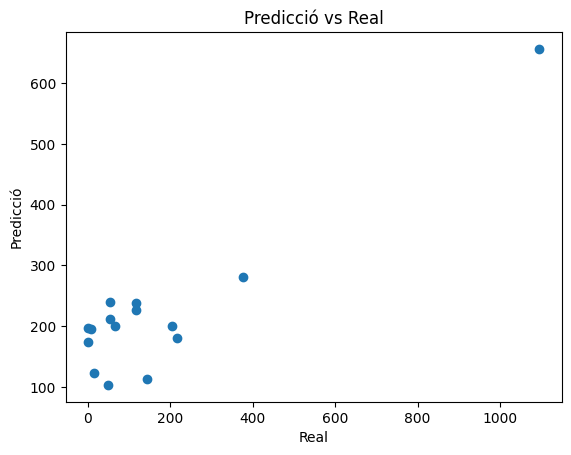

In [96]:
from sklearn.metrics import mean_squared_error, r2_score

X_test = scaler.transform(X_test)
X_test_filtrat = pd.DataFrame(X_test, columns=df.drop(columns='temps_fins_reincidencia1a').columns)[coef_significatius.index]


y_test_pred = best_model.predict(X_test_filtrat)

# Calculem la mètrica MSE i R²
test_mse = mean_squared_error(y_test, y_test_pred)

print("\n--- AVALUACIÓ FINAL EN TEST ---")
print(f"MSE (Test): {test_mse:.4f}")


## plot de les prediccions
plt.scatter(y_test, y_test_pred)
plt.xlabel('Real')
plt.ylabel('Predicció')
plt.title('Predicció vs Real')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

## fem grid search per trobar els millors hiperparàmetres

param_grid = {
    'n_estimators': [20,50,100],
    'max_depth': [300,400,500],
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(
    rf, 
    param_grid, 
    cv=10, 
    scoring='neg_mean_squared_error', 
    return_train_score=True
)

# Realitzem el Grid Search
grid_search.fit(X_train_filtrat, y_train)

# Resultats
print("Millor paràmetre:", grid_search.best_params_)
print("Millor precisió:", -grid_search.best_score_)  # Negatiu perquè s'ha usat neg_mean_squared_error

# Mostrem la mitjana dels resultats de test
print("Mitjana dels resultats de test per cada combinació:")
print(np.mean(grid_search.cv_results_['mean_test_score'] * -1))  # Multipliquem per -1 per obtenir el MSE positiu

best_model = grid_search.best_estimator_


ValueError: Found input variables with inconsistent numbers of samples: [28, 57]

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

X_test = scaler.transform(X_test)
X_test_filtrat = pd.DataFrame(X_test, columns=df.drop(columns='temps_fins_reincidencia1a').columns)[coef_significatius.index]


y_test_pred = best_model.predict(X_test_filtrat)

# Calculem la mètrica MSE i R²
test_mse = mean_squared_error(y_test, y_test_pred)

print("\n--- AVALUACIÓ FINAL EN TEST ---")
print(f"MSE (Test): {test_mse:.4f}")


## plot de les prediccions
plt.scatter(y_test, y_test_pred)
plt.xlabel('Real')
plt.ylabel('Predicció')
plt.title('Predicció vs Real')
plt.show()

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

# Definim la graella d'hiperparàmetres
param_grid = {
    'n_estimators': [20, 50, 100],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgb = XGBRegressor(objective='reg:squarederror')

grid_search = GridSearchCV(
    xgb, 
    param_grid, 
    cv=10, 
    scoring='neg_mean_squared_error', 
    return_train_score=True
)

# Realitzem el Grid Search
grid_search.fit(X_train_filtrat, y_train)

# Resultats
print("Millor paràmetre:", grid_search.best_params_)
print("Millor precisió:", -grid_search.best_score_)  # Negatiu perquè s'ha usat neg_mean_squared_error

#
